In [2]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [1]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced',n_estimators = 400).fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [4]:
#reading data file
df = pd.read_excel('Mini_protein_data_Ha_for_ml_3_4.xlsx')

In [5]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category_0_1','Category_3_4','Category'], axis = 1)
Y = df['Category_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y)
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)
X.shape

(1777, 57)

Base Non-Tranformed data
[[176  98]
 [100 160]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


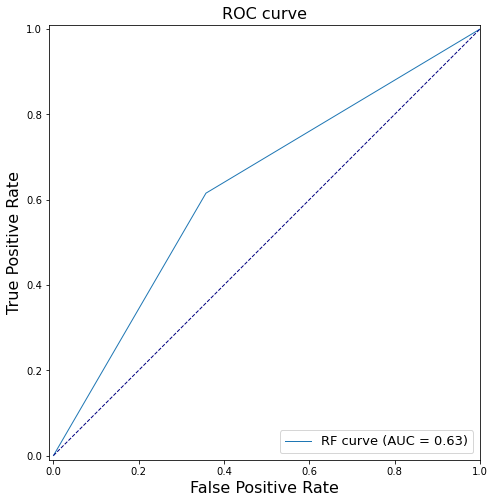

PCA Transformed - 2 dimensions is :-
[9.64910892 7.60905362]
[[166 108]
 [123 137]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       274
           1       0.56      0.53      0.54       260

    accuracy                           0.57       534
   macro avg       0.57      0.57      0.57       534
weighted avg       0.57      0.57      0.57       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


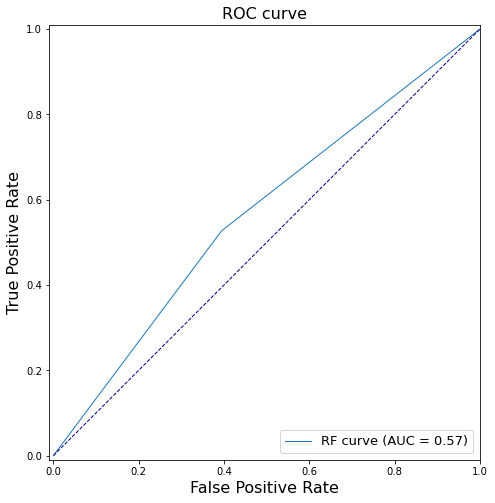

PCA Transformed - 3 dimensions is :-
[9.64910892 7.60905362 2.72783504]
[[177  97]
 [112 148]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       274
           1       0.60      0.57      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


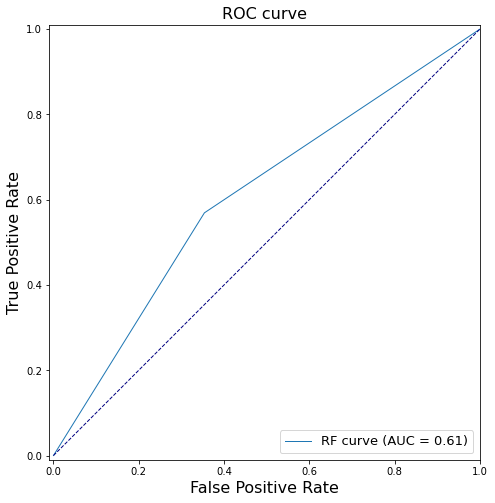

PCA Transformed - 4 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987 ]
[[176  98]
 [102 158]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       274
           1       0.62      0.61      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


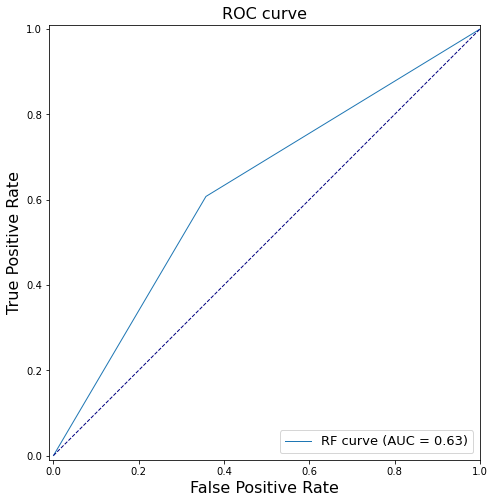

PCA Transformed - 5 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639]
[[182  92]
 [100 160]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       274
           1       0.63      0.62      0.62       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


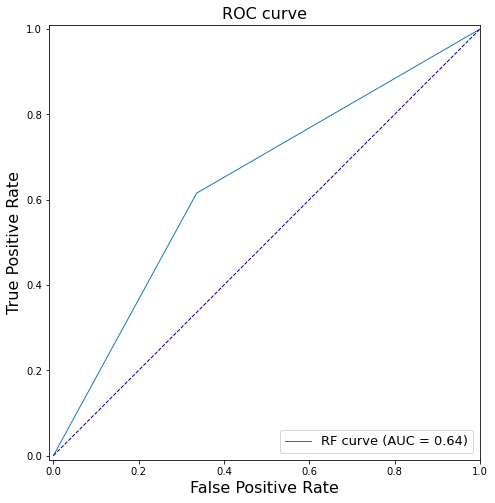

PCA Transformed - 6 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625]
[[183  91]
 [105 155]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       274
           1       0.63      0.60      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


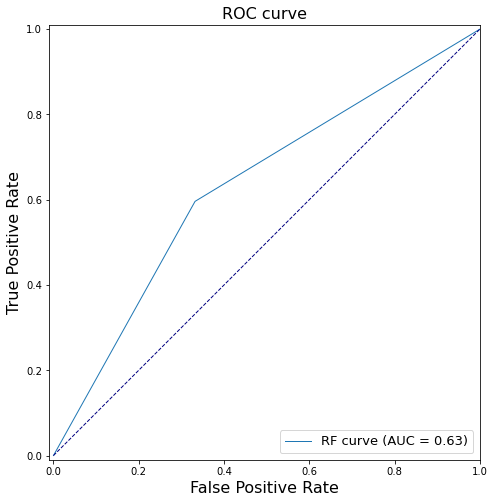

PCA Transformed - 7 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976  ]
[[177  97]
 [ 96 164]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       274
           1       0.63      0.63      0.63       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


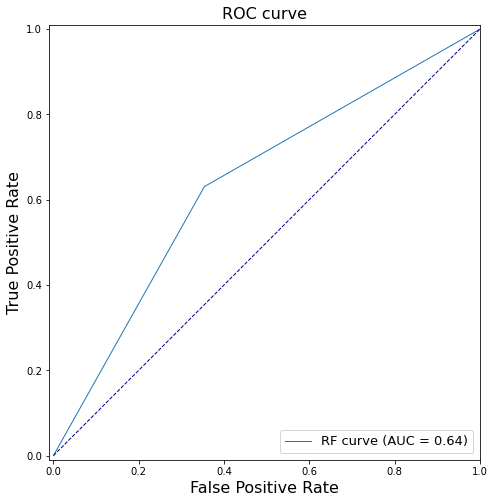

PCA Transformed - 8 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809]
[[179  95]
 [103 157]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       274
           1       0.62      0.60      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


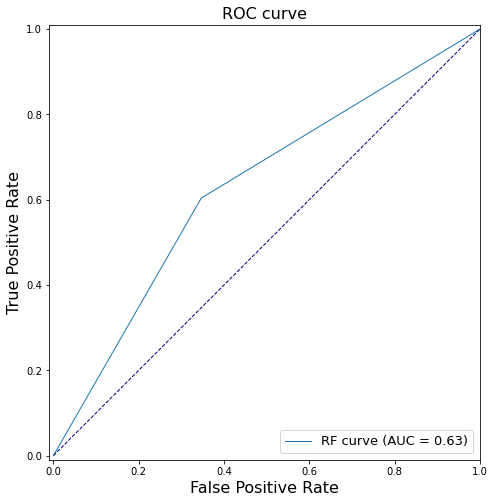

PCA Transformed - 9 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641]
[[172 102]
 [ 93 167]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       274
           1       0.62      0.64      0.63       260

    accuracy                           0.63       534
   macro avg       0.63      0.64      0.63       534
weighted avg       0.64      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


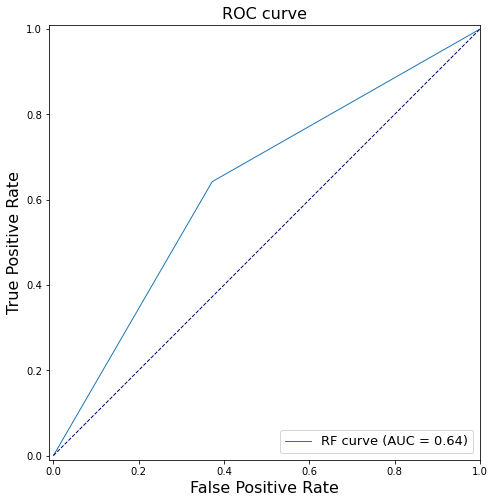

PCA Transformed - 10 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389]
[[171 103]
 [ 97 163]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       274
           1       0.61      0.63      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


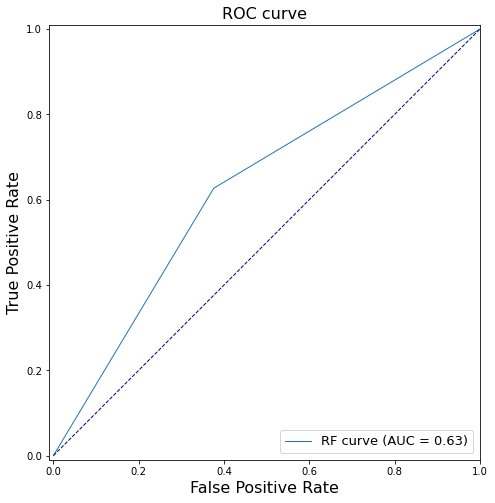

PCA Transformed - 11 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056]
[[172 102]
 [ 98 162]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       274
           1       0.61      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


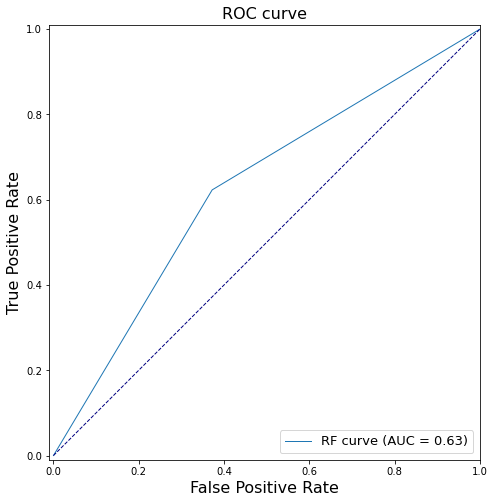

PCA Transformed - 12 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946]
[[176  98]
 [ 98 162]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


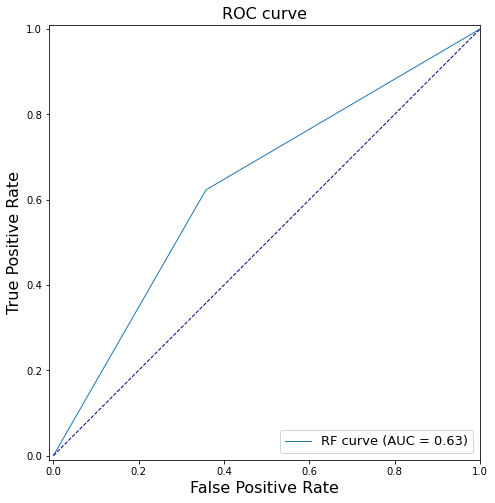

PCA Transformed - 13 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113]
[[175  99]
 [100 160]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


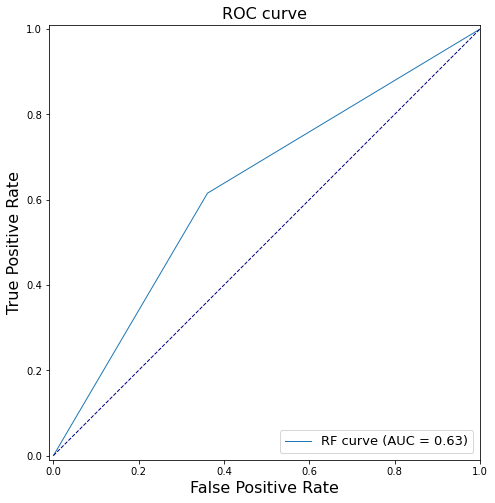

PCA Transformed - 14 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835]
[[181  93]
 [101 159]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       274
           1       0.63      0.61      0.62       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


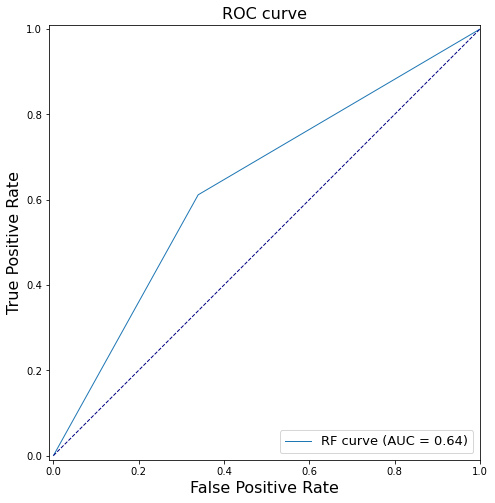

PCA Transformed - 15 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029]
[[173 101]
 [101 159]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       274
           1       0.61      0.61      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


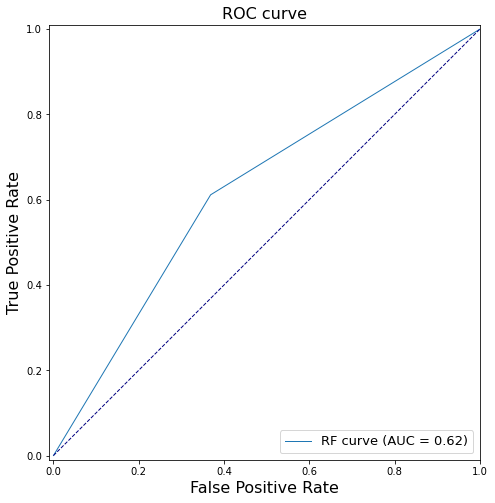

PCA Transformed - 16 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986]
[[173 101]
 [106 154]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       274
           1       0.60      0.59      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


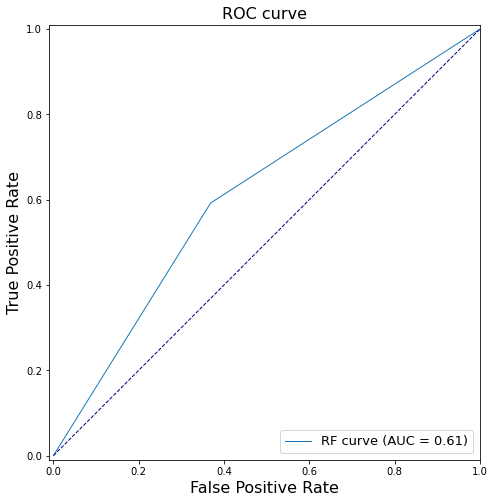

PCA Transformed - 17 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662]
[[179  95]
 [108 152]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       274
           1       0.62      0.58      0.60       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


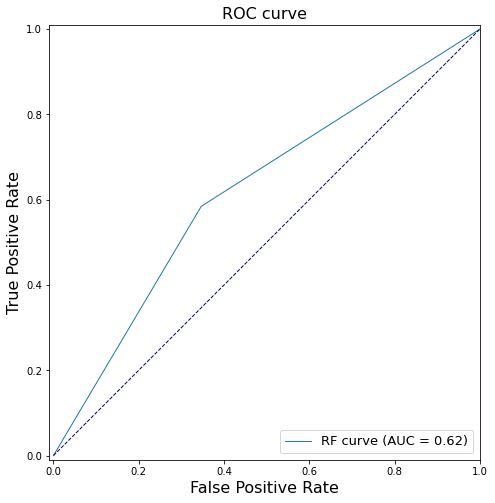

PCA Transformed - 18 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654]
[[180  94]
 [108 152]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       274
           1       0.62      0.58      0.60       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


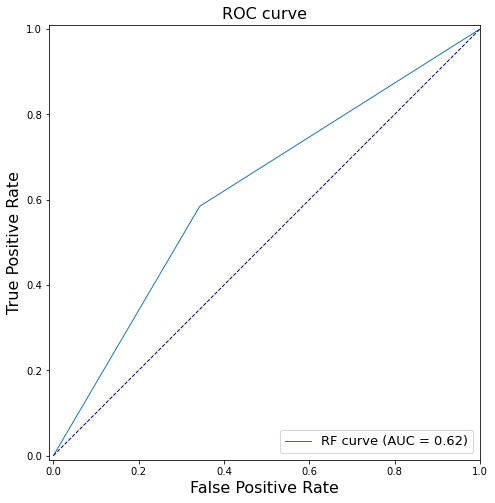

PCA Transformed - 19 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044]
[[179  95]
 [114 146]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       274
           1       0.61      0.56      0.58       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


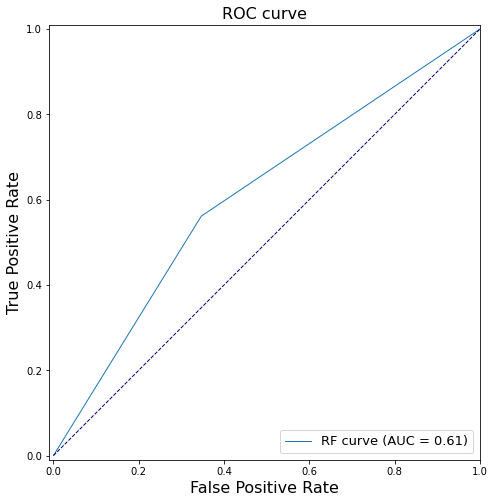

PCA Transformed - 20 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125]
[[177  97]
 [110 150]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       274
           1       0.61      0.58      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


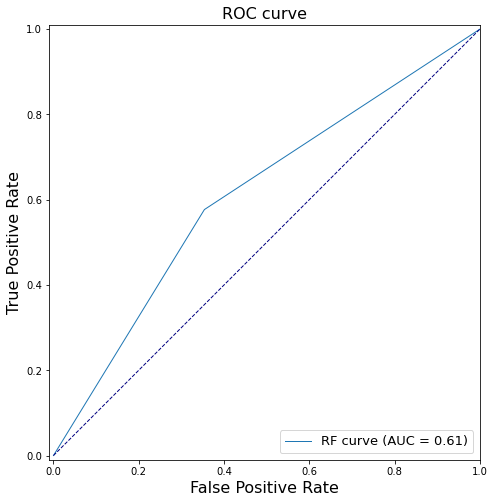

PCA Transformed - 21 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633]
[[175  99]
 [108 152]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       274
           1       0.61      0.58      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


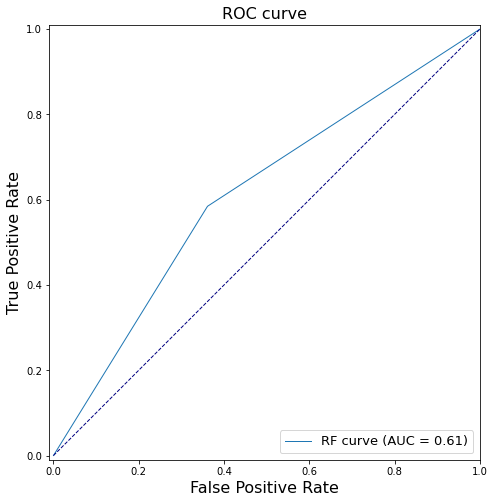

PCA Transformed - 22 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317]
[[185  89]
 [106 154]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.65       274
           1       0.63      0.59      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


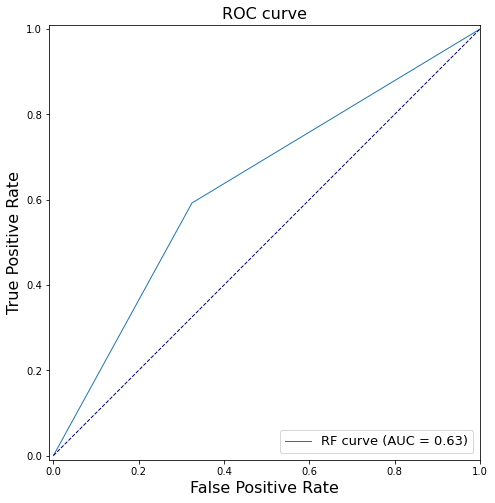

PCA Transformed - 23 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172]
[[180  94]
 [114 146]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       274
           1       0.61      0.56      0.58       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


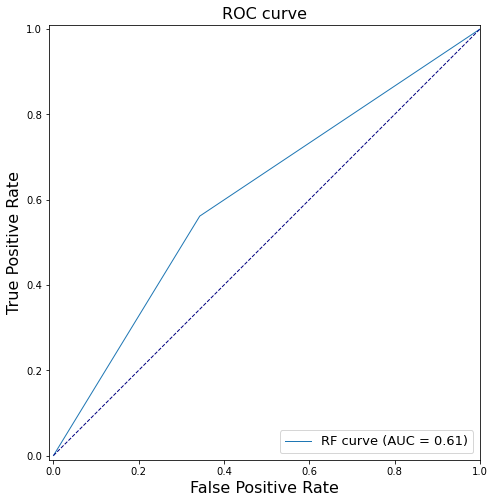

PCA Transformed - 24 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003]
[[179  95]
 [108 152]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       274
           1       0.62      0.58      0.60       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


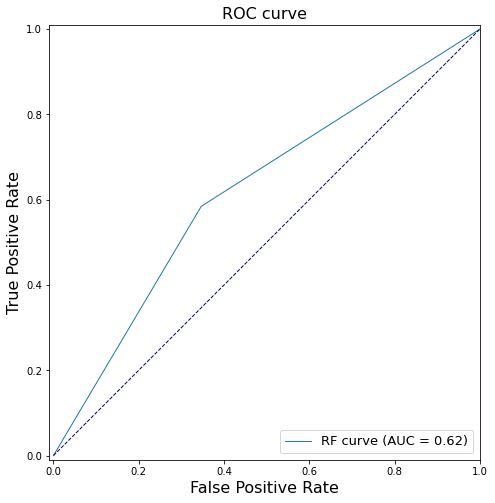

PCA Transformed - 25 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297  ]
[[179  95]
 [ 96 164]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       274
           1       0.63      0.63      0.63       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


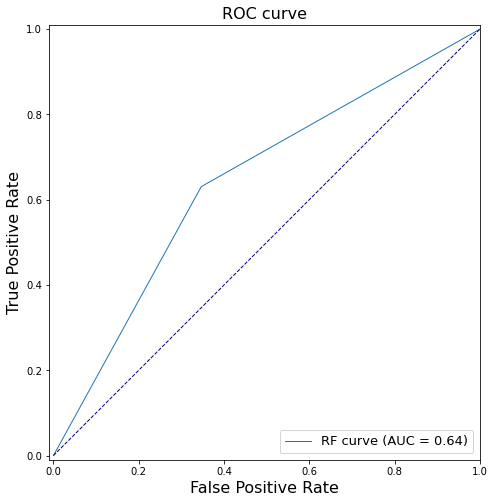

PCA Transformed - 26 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816]
[[180  94]
 [110 150]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       274
           1       0.61      0.58      0.60       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


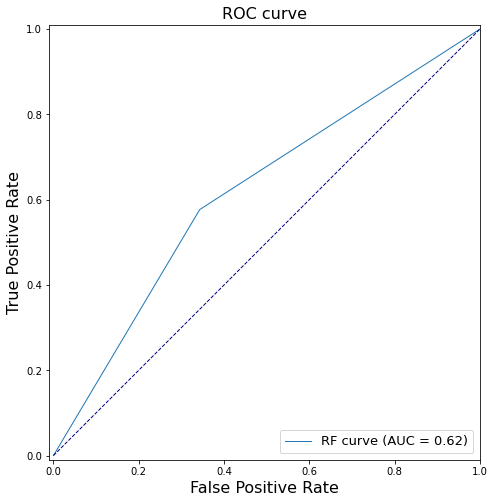

PCA Transformed - 27 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574 ]
[[182  92]
 [111 149]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       274
           1       0.62      0.57      0.59       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


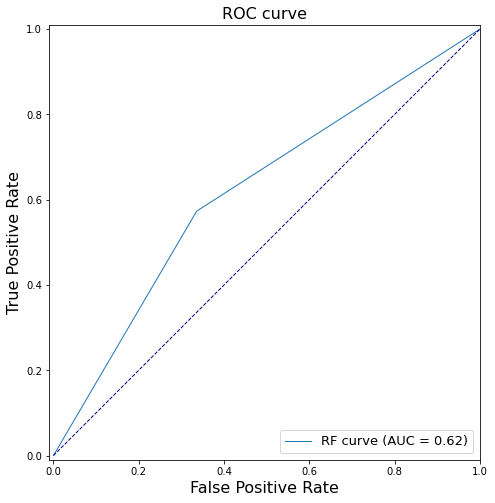

PCA Transformed - 28 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574  0.04411082]
[[181  93]
 [111 149]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       274
           1       0.62      0.57      0.59       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


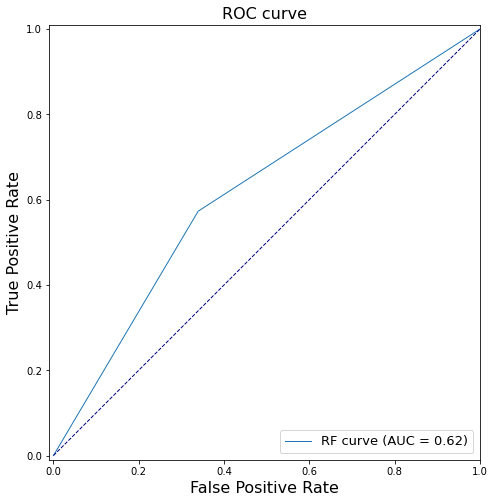

PCA Transformed - 29 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574  0.04411082 0.04057821]
[[185  89]
 [108 152]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       274
           1       0.63      0.58      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


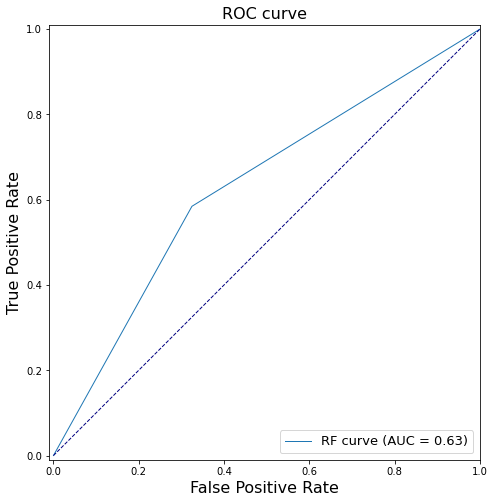

PCA Transformed - 30 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574  0.04411082 0.04057821 0.03326884]
[[175  99]
 [106 154]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       274
           1       0.61      0.59      0.60       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


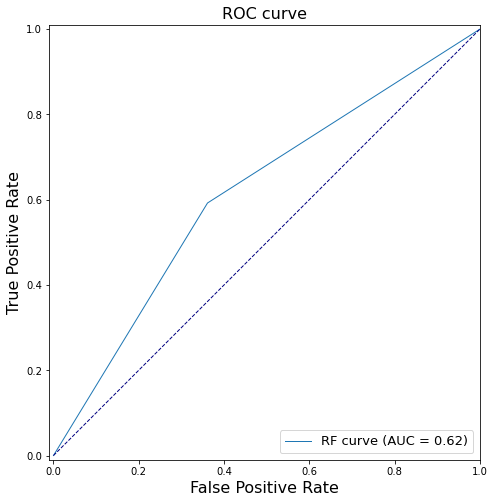

PCA Transformed - 31 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574  0.04411082 0.04057821 0.03326884
 0.02931203]
[[181  93]
 [112 148]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       274
           1       0.61      0.57      0.59       260

    accuracy                           0.62       534
   macro avg       0.62      0.61      0.61       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


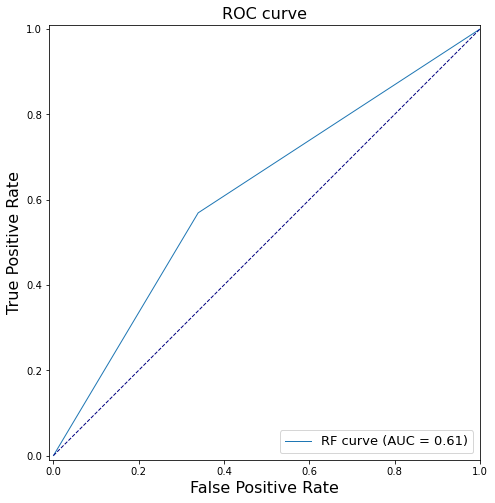

PCA Transformed - 32 dimensions is :-
[9.64910892 7.60905362 2.72783504 1.6366987  1.39442639 1.10372625
 0.730976   0.56396809 0.50165641 0.38331389 0.34712056 0.33862946
 0.28005113 0.26013835 0.23066029 0.20731986 0.19607662 0.15799654
 0.14081044 0.12048125 0.10587633 0.08402317 0.08101172 0.07255003
 0.065297   0.05652816 0.0513574  0.04411082 0.04057821 0.03326884
 0.02931203 0.02064067]
[[173 101]
 [105 155]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       274
           1       0.61      0.60      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


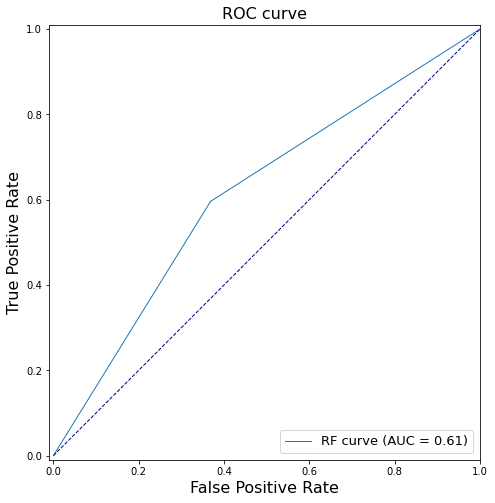

PCA Transformed - 33 dimensions is :-
[9.64910892e+00 7.60905362e+00 2.72783504e+00 1.63669870e+00
 1.39442639e+00 1.10372625e+00 7.30976002e-01 5.63968094e-01
 5.01656414e-01 3.83313890e-01 3.47120557e-01 3.38629456e-01
 2.80051130e-01 2.60138353e-01 2.30660289e-01 2.07319864e-01
 1.96076616e-01 1.57996542e-01 1.40810440e-01 1.20481252e-01
 1.05876327e-01 8.40231683e-02 8.10117174e-02 7.25500272e-02
 6.52969969e-02 5.65281645e-02 5.13573961e-02 4.41108161e-02
 4.05782094e-02 3.32688359e-02 2.93120257e-02 2.06406741e-02
 9.58951550e-03]
[[188  86]
 [112 148]]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       274
           1       0.63      0.57      0.60       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


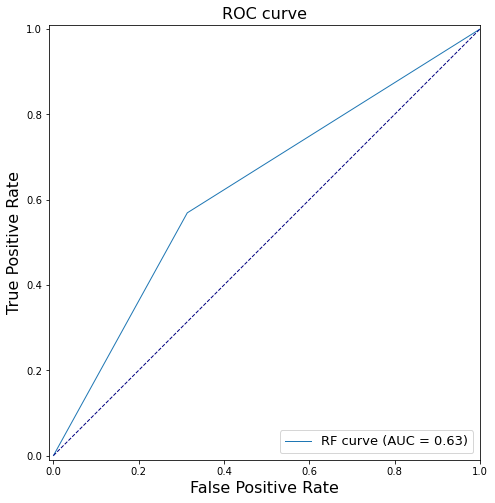

PCA Transformed - 34 dimensions is :-
[9.64910892e+00 7.60905362e+00 2.72783504e+00 1.63669870e+00
 1.39442639e+00 1.10372625e+00 7.30976002e-01 5.63968094e-01
 5.01656414e-01 3.83313890e-01 3.47120557e-01 3.38629456e-01
 2.80051130e-01 2.60138353e-01 2.30660289e-01 2.07319864e-01
 1.96076616e-01 1.57996542e-01 1.40810440e-01 1.20481252e-01
 1.05876327e-01 8.40231683e-02 8.10117174e-02 7.25500272e-02
 6.52969969e-02 5.65281645e-02 5.13573961e-02 4.41108161e-02
 4.05782094e-02 3.32688359e-02 2.93120257e-02 2.06406741e-02
 9.58951550e-03 9.29341437e-03]
[[183  91]
 [107 153]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       274
           1       0.63      0.59      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


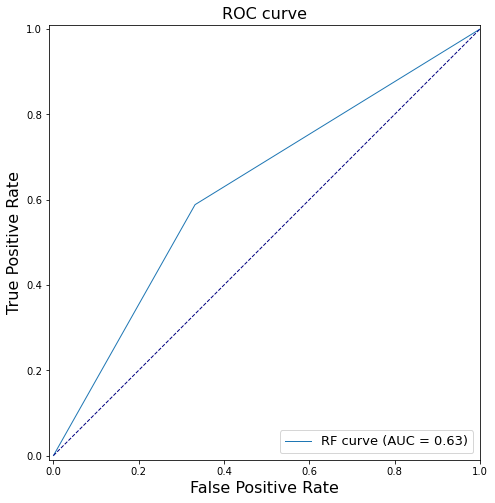

In [6]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

PCA Transformed Best is in 10 dimensions Resulting in :-
[9.29595368 2.81097754 2.17477552 1.10005781 0.77190454 0.57907352
 0.56457067 0.4337498  0.32070753 0.26742899]
[[435  87]
 [163 144]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       522
           1       0.62      0.47      0.54       307

    accuracy                           0.70       829
   macro avg       0.68      0.65      0.66       829
weighted avg       0.69      0.70      0.69       829



<ipython-input-2-dad97d683de0>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


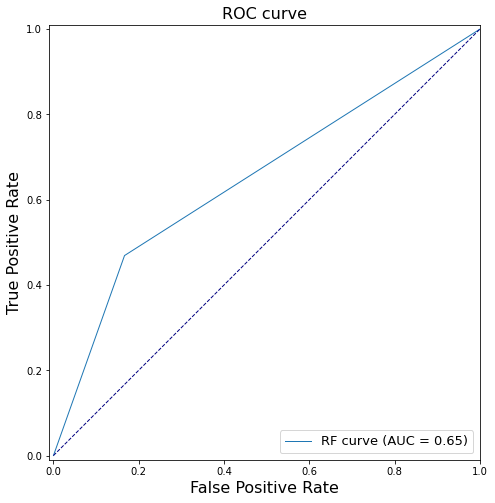

In [9]:
#Plotting Best PCA
pca = PCA(n_components=10,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 10 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1777 samples in 0.009s...
[t-SNE] Computed neighbors for 1777 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1777
[t-SNE] Computed conditional probabilities for sample 1777 / 1777
[t-SNE] Mean sigma: 1.000440
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.241383
[t-SNE] KL divergence after 600 iterations: 0.935397
[[171 103]
 [108 152]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       274
           1       0.60      0.58      0.59       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


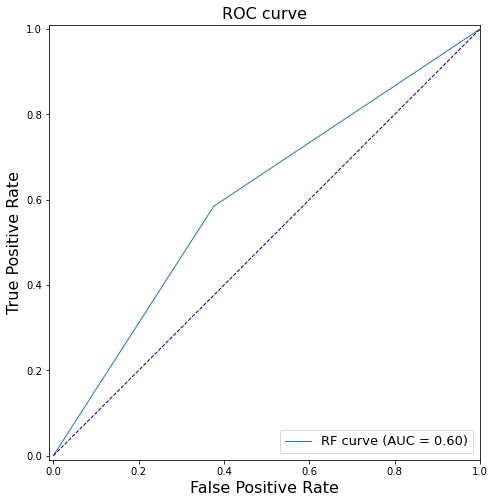

In [7]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[170 104]
 [ 97 163]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       274
           1       0.61      0.63      0.62       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


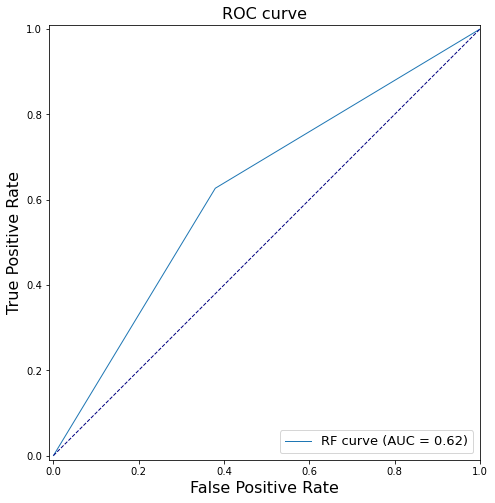

LLE Transformed - 1 dimensions is :-
[[151 123]
 [ 91 169]]
              precision    recall  f1-score   support

           0       0.62      0.55      0.59       274
           1       0.58      0.65      0.61       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


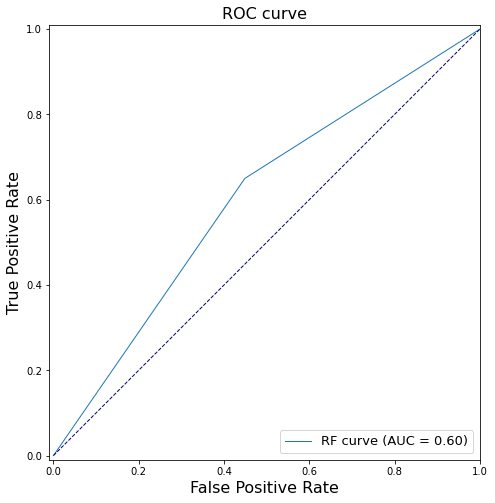

LLE Transformed - 2 dimensions is :-
[[109 165]
 [ 31 229]]
              precision    recall  f1-score   support

           0       0.78      0.40      0.53       274
           1       0.58      0.88      0.70       260

    accuracy                           0.63       534
   macro avg       0.68      0.64      0.61       534
weighted avg       0.68      0.63      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


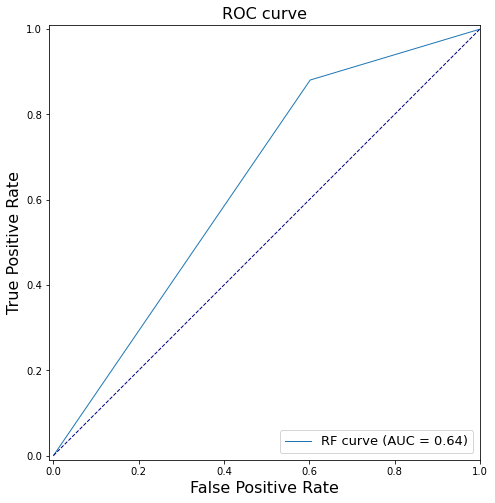

LLE Transformed - 3 dimensions is :-
[[119 155]
 [ 40 220]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55       274
           1       0.59      0.85      0.69       260

    accuracy                           0.63       534
   macro avg       0.67      0.64      0.62       534
weighted avg       0.67      0.63      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


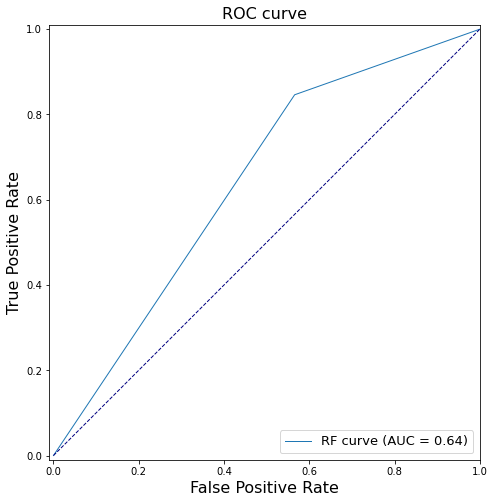

LLE Transformed - 4 dimensions is :-
[[140 134]
 [ 75 185]]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57       274
           1       0.58      0.71      0.64       260

    accuracy                           0.61       534
   macro avg       0.62      0.61      0.61       534
weighted avg       0.62      0.61      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


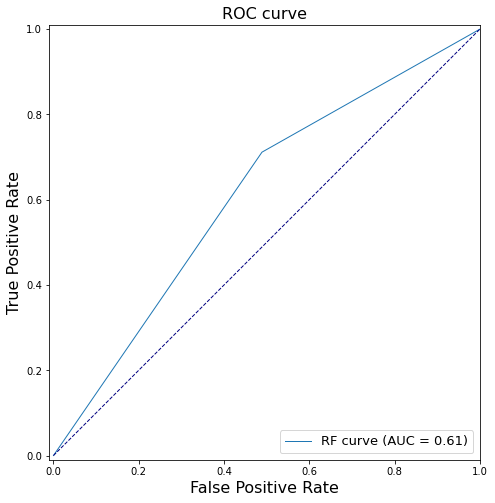

LLE Transformed - 5 dimensions is :-
[[129 145]
 [ 66 194]]
              precision    recall  f1-score   support

           0       0.66      0.47      0.55       274
           1       0.57      0.75      0.65       260

    accuracy                           0.60       534
   macro avg       0.62      0.61      0.60       534
weighted avg       0.62      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


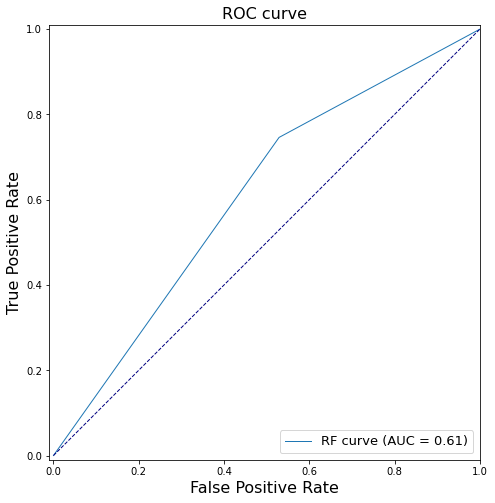

LLE Transformed - 6 dimensions is :-
[[157 117]
 [124 136]]
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       274
           1       0.54      0.52      0.53       260

    accuracy                           0.55       534
   macro avg       0.55      0.55      0.55       534
weighted avg       0.55      0.55      0.55       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


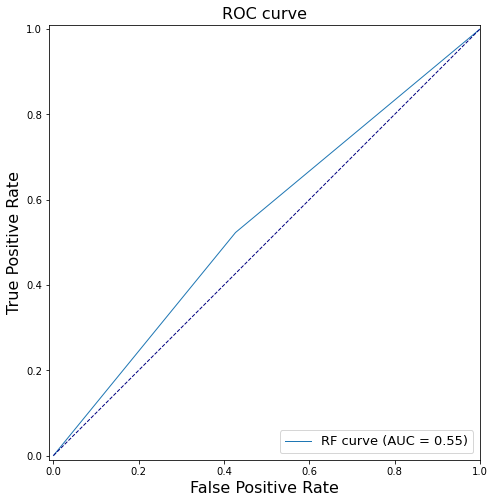

LLE Transformed - 7 dimensions is :-
[[165 109]
 [118 142]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       274
           1       0.57      0.55      0.56       260

    accuracy                           0.57       534
   macro avg       0.57      0.57      0.57       534
weighted avg       0.57      0.57      0.57       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


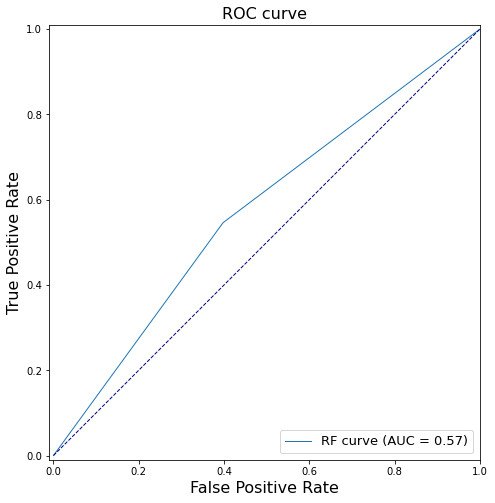

LLE Transformed - 8 dimensions is :-
[[159 115]
 [102 158]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.59       274
           1       0.58      0.61      0.59       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


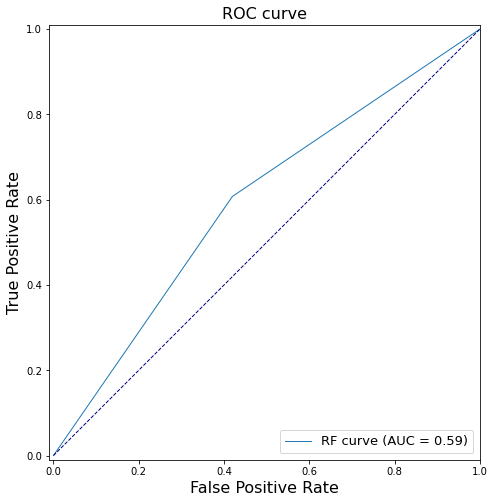

LLE Transformed - 9 dimensions is :-
[[157 117]
 [109 151]]
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       274
           1       0.56      0.58      0.57       260

    accuracy                           0.58       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.58      0.58      0.58       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


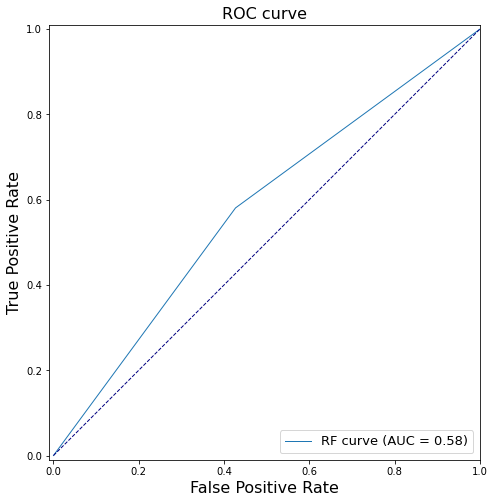

LLE Transformed - 10 dimensions is :-
[[157 117]
 [107 153]]
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       274
           1       0.57      0.59      0.58       260

    accuracy                           0.58       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.58      0.58      0.58       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


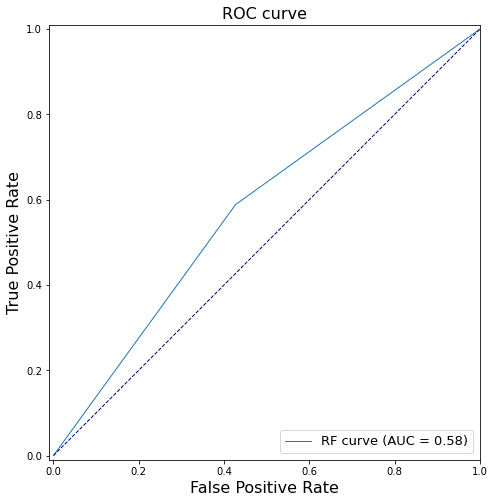

LLE Transformed - 11 dimensions is :-
[[150 124]
 [111 149]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       274
           1       0.55      0.57      0.56       260

    accuracy                           0.56       534
   macro avg       0.56      0.56      0.56       534
weighted avg       0.56      0.56      0.56       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


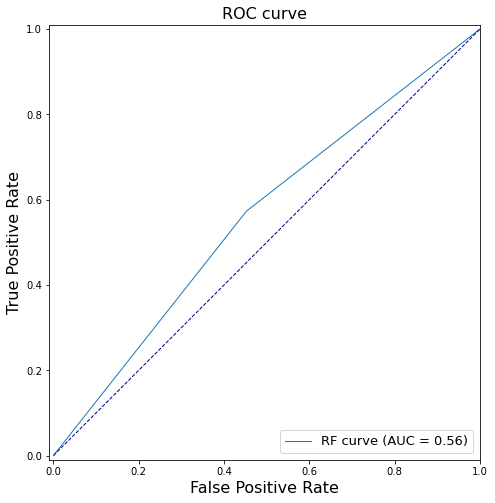

LLE Transformed - 12 dimensions is :-
[[156 118]
 [111 149]]
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       274
           1       0.56      0.57      0.57       260

    accuracy                           0.57       534
   macro avg       0.57      0.57      0.57       534
weighted avg       0.57      0.57      0.57       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


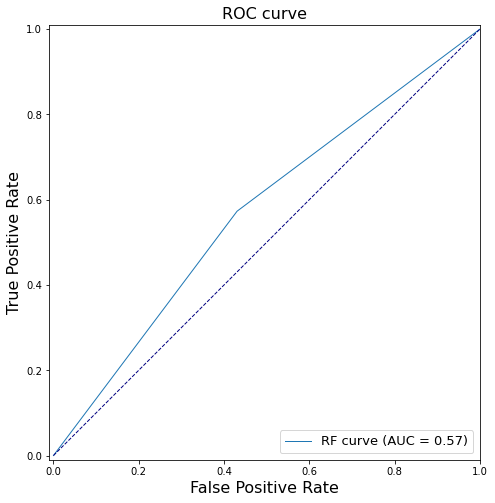

LLE Transformed - 13 dimensions is :-
[[156 118]
 [110 150]]
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       274
           1       0.56      0.58      0.57       260

    accuracy                           0.57       534
   macro avg       0.57      0.57      0.57       534
weighted avg       0.57      0.57      0.57       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


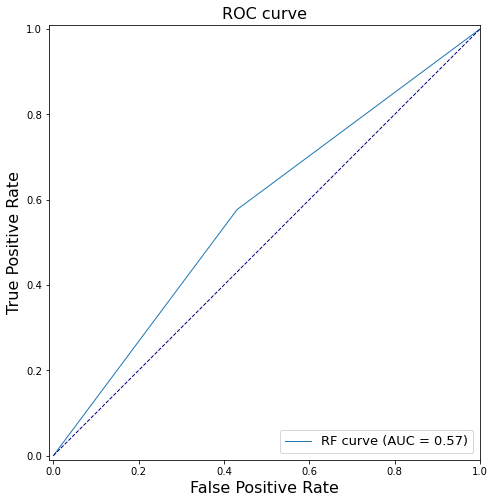

LLE Transformed - 14 dimensions is :-
[[160 114]
 [102 158]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       274
           1       0.58      0.61      0.59       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


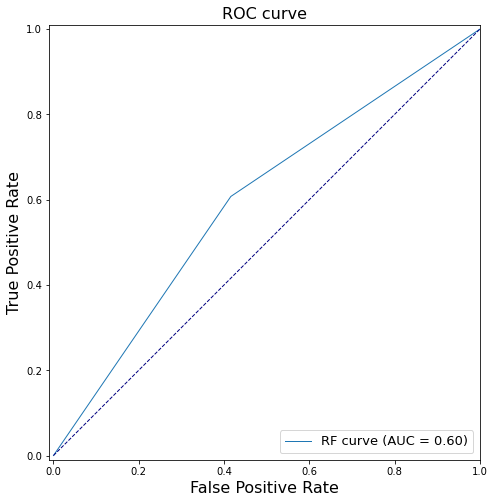

LLE Transformed - 15 dimensions is :-
[[163 111]
 [106 154]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       274
           1       0.58      0.59      0.59       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


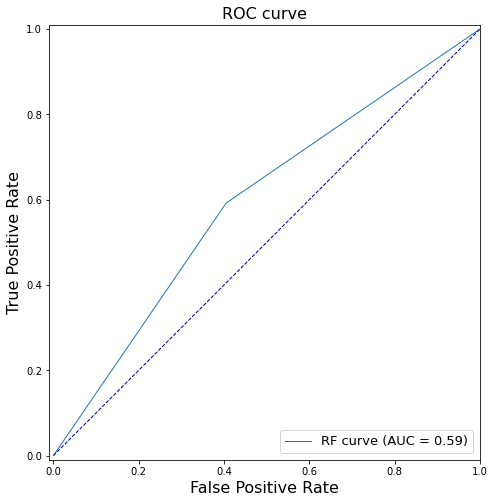

LLE Transformed - 16 dimensions is :-
[[161 113]
 [101 159]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       274
           1       0.58      0.61      0.60       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


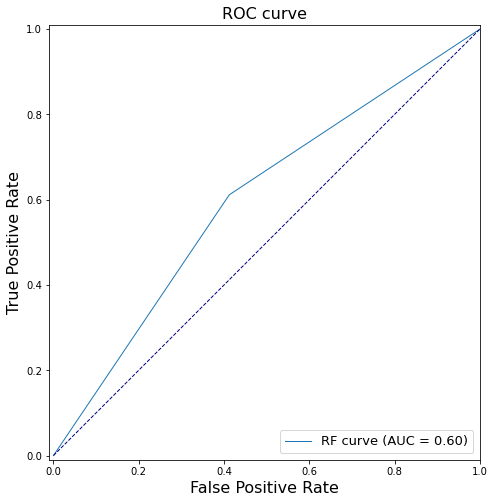

LLE Transformed - 17 dimensions is :-
[[168 106]
 [109 151]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       274
           1       0.59      0.58      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


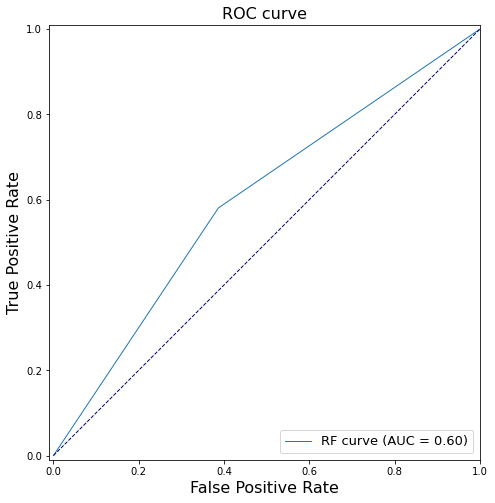

LLE Transformed - 18 dimensions is :-
[[165 109]
 [106 154]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       274
           1       0.59      0.59      0.59       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


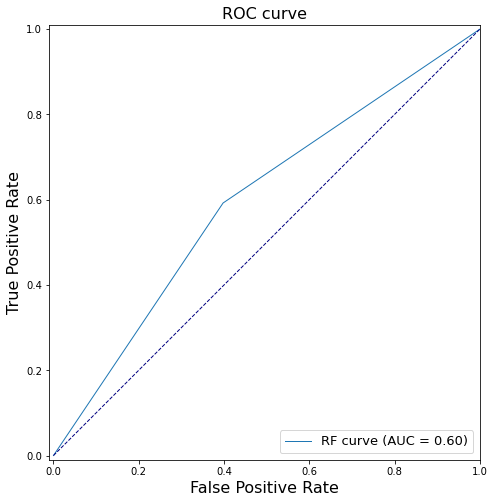

LLE Transformed - 19 dimensions is :-
[[170 104]
 [106 154]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       274
           1       0.60      0.59      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


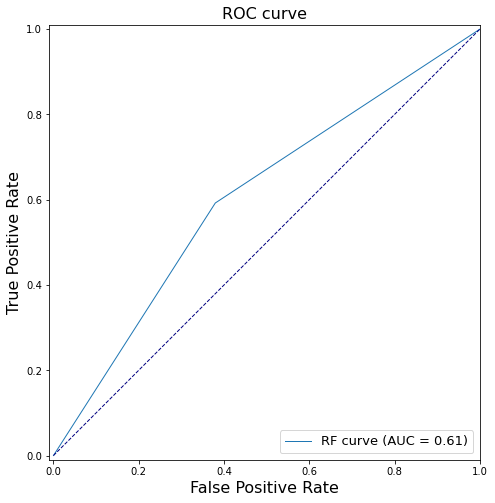

LLE Transformed - 20 dimensions is :-
[[165 109]
 [109 151]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       274
           1       0.58      0.58      0.58       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


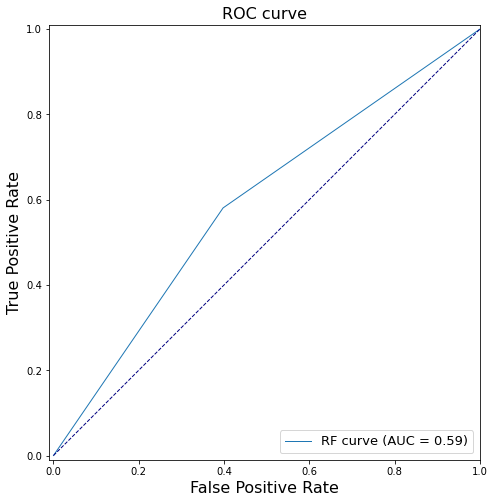

LLE Transformed - 21 dimensions is :-
[[169 105]
 [112 148]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       274
           1       0.58      0.57      0.58       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


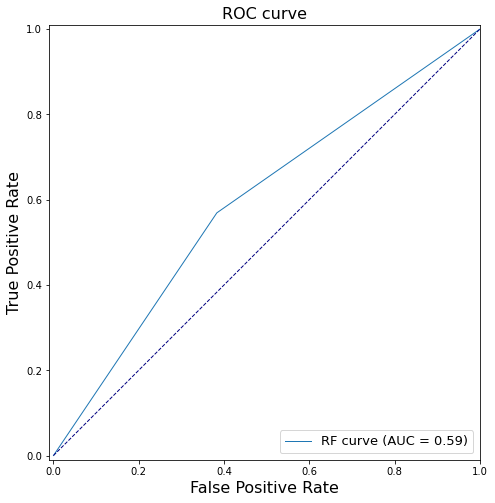

LLE Transformed - 22 dimensions is :-
[[172 102]
 [116 144]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       274
           1       0.59      0.55      0.57       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


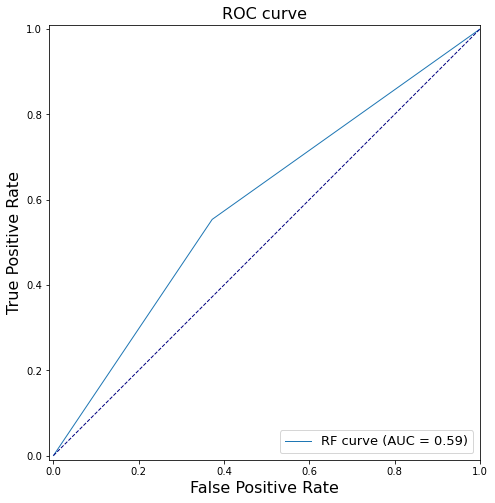

LLE Transformed - 23 dimensions is :-
[[168 106]
 [110 150]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       274
           1       0.59      0.58      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


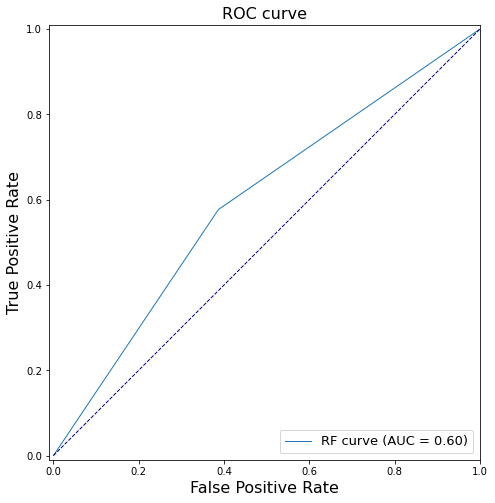

LLE Transformed - 24 dimensions is :-
[[173 101]
 [112 148]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       274
           1       0.59      0.57      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


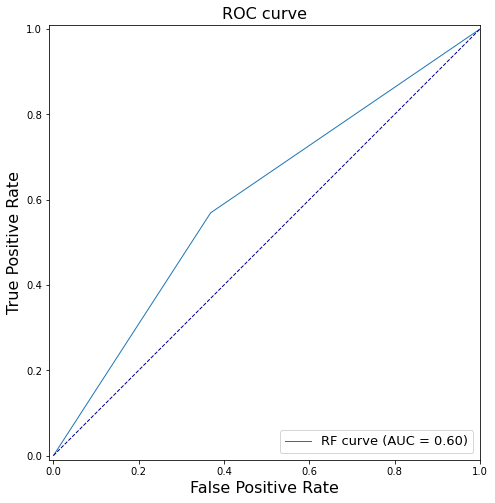

LLE Transformed - 25 dimensions is :-
[[170 104]
 [118 142]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       274
           1       0.58      0.55      0.56       260

    accuracy                           0.58       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.58      0.58      0.58       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


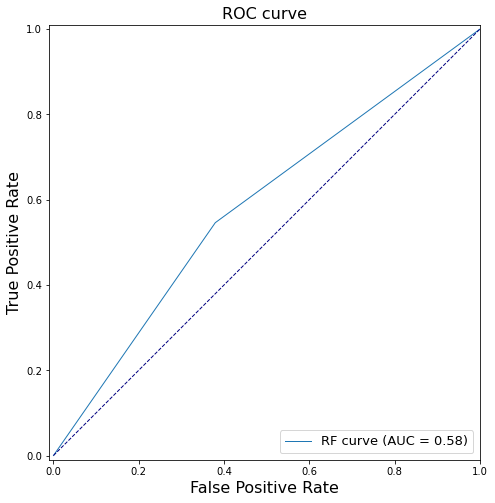

LLE Transformed - 26 dimensions is :-
[[173 101]
 [116 144]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       274
           1       0.59      0.55      0.57       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


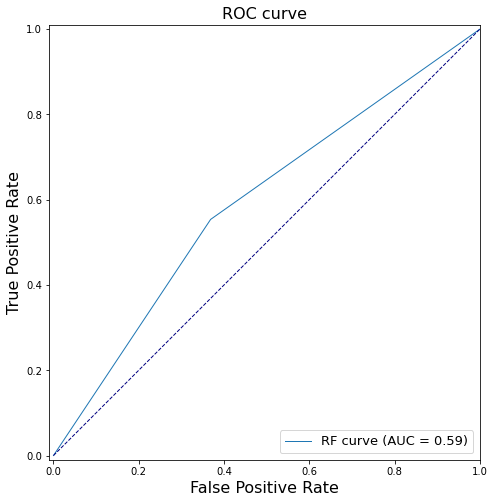

LLE Transformed - 27 dimensions is :-
[[168 106]
 [117 143]]
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       274
           1       0.57      0.55      0.56       260

    accuracy                           0.58       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.58      0.58      0.58       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


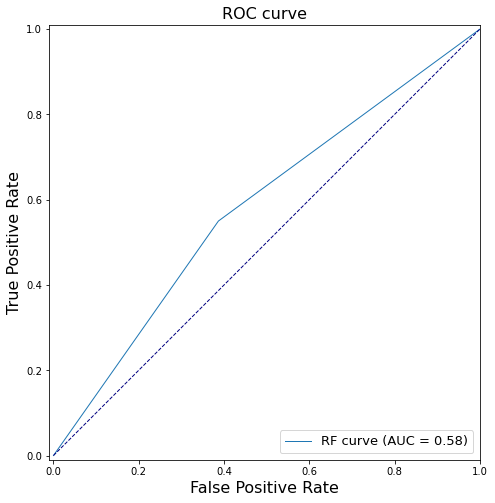

LLE Transformed - 28 dimensions is :-
[[169 105]
 [118 142]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       274
           1       0.57      0.55      0.56       260

    accuracy                           0.58       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.58      0.58      0.58       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


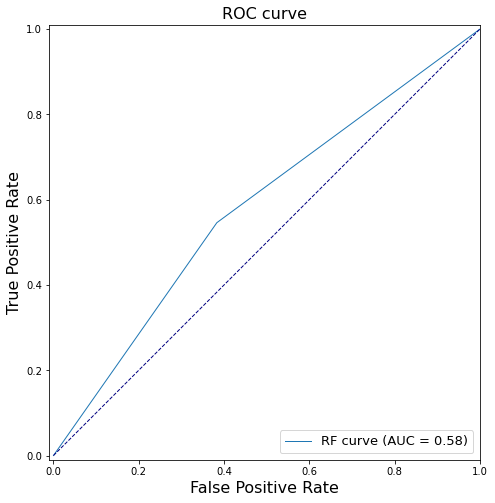

LLE Transformed - 29 dimensions is :-
[[170 104]
 [116 144]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       274
           1       0.58      0.55      0.57       260

    accuracy                           0.59       534
   macro avg       0.59      0.59      0.59       534
weighted avg       0.59      0.59      0.59       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


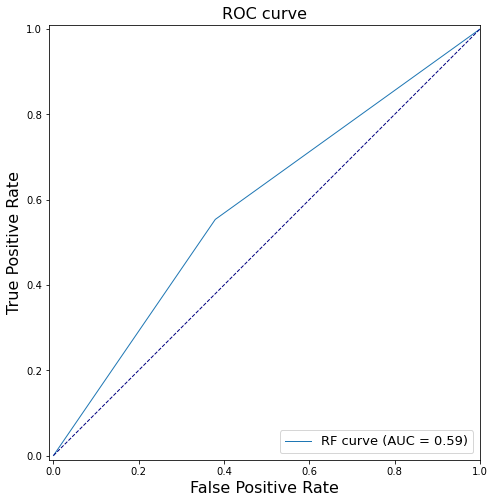

In [8]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[152 122]
 [109 151]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.57       274
           1       0.55      0.58      0.57       260

    accuracy                           0.57       534
   macro avg       0.57      0.57      0.57       534
weighted avg       0.57      0.57      0.57       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


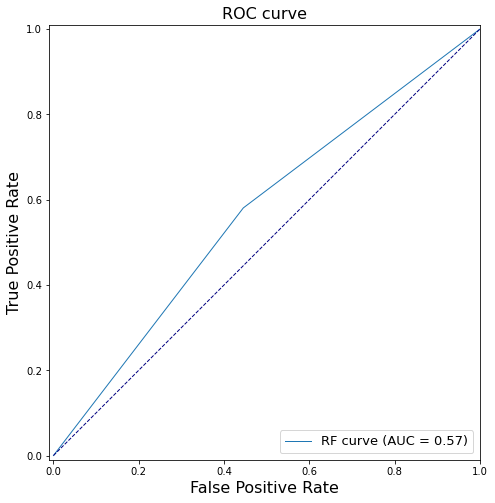

In [9]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[173 101]
 [100 160]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       274
           1       0.61      0.62      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


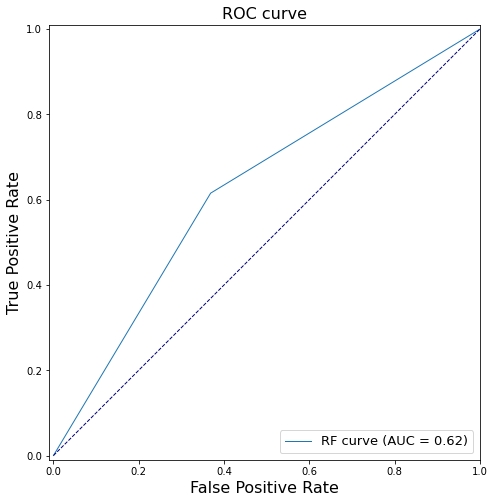

ICA Transformed - 3 dimensions is :-
[[174 100]
 [107 153]]
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       274
           1       0.60      0.59      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


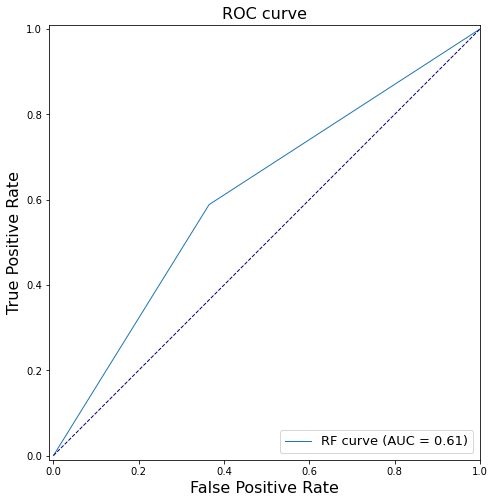

ICA Transformed - 4 dimensions is :-
[[173 101]
 [112 148]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       274
           1       0.59      0.57      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


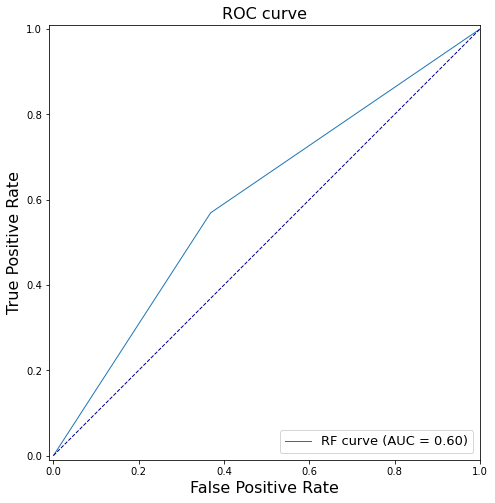

ICA Transformed - 5 dimensions is :-
[[174 100]
 [ 99 161]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


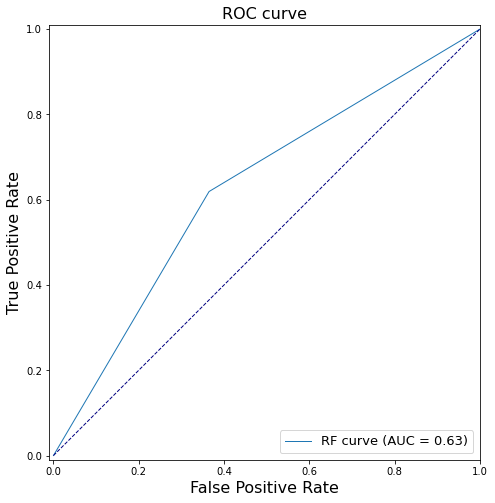

ICA Transformed - 6 dimensions is :-
[[175  99]
 [115 145]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       274
           1       0.59      0.56      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


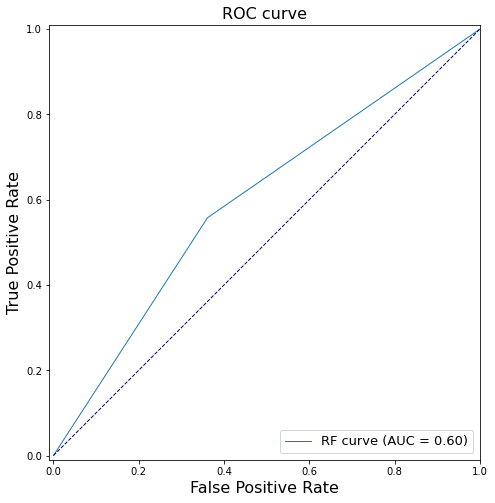

ICA Transformed - 7 dimensions is :-
[[182  92]
 [105 155]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       274
           1       0.63      0.60      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


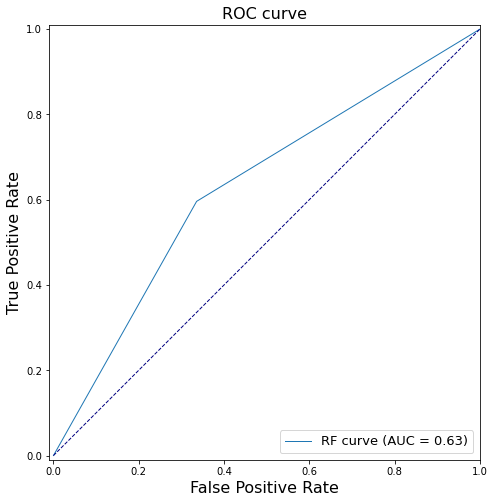

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 8 dimensions is :-
[[172 102]
 [104 156]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       274
           1       0.60      0.60      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


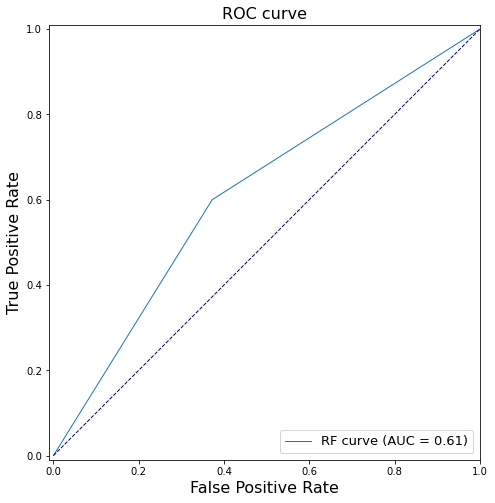

ICA Transformed - 9 dimensions is :-
[[170 104]
 [104 156]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       274
           1       0.60      0.60      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


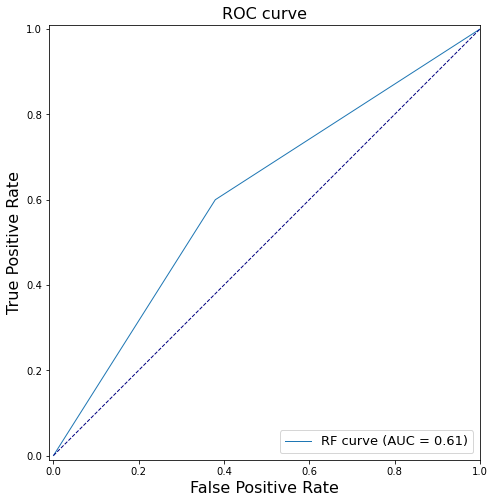

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 10 dimensions is :-
[[175  99]
 [102 158]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       274
           1       0.61      0.61      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


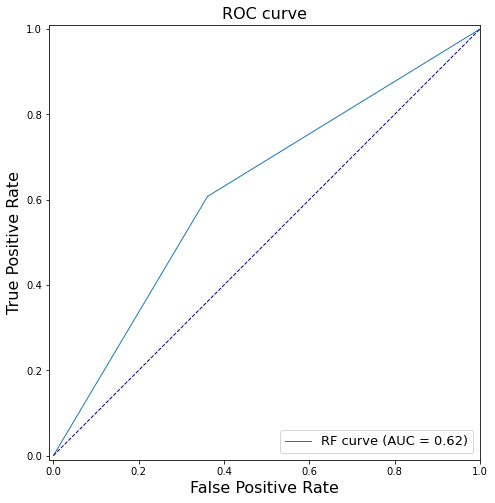

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 11 dimensions is :-
[[175  99]
 [104 156]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       274
           1       0.61      0.60      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


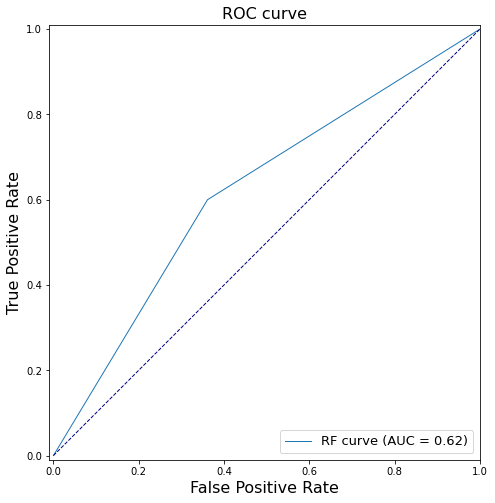

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 12 dimensions is :-
[[182  92]
 [103 157]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       274
           1       0.63      0.60      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


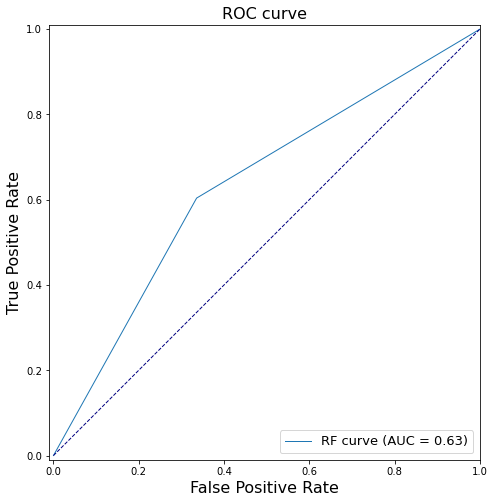

ICA Transformed - 13 dimensions is :-
[[164 110]
 [100 160]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       274
           1       0.59      0.62      0.60       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


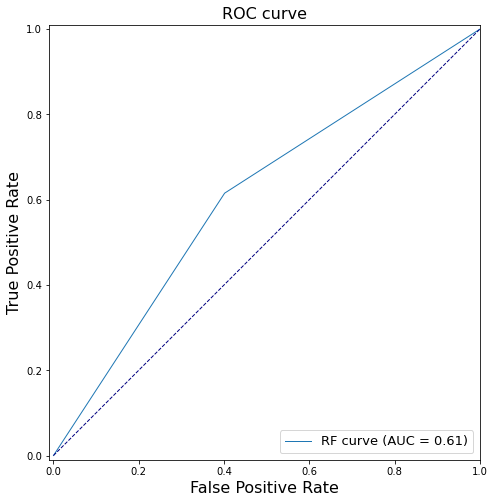

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 14 dimensions is :-
[[182  92]
 [ 87 173]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       274
           1       0.65      0.67      0.66       260

    accuracy                           0.66       534
   macro avg       0.66      0.66      0.66       534
weighted avg       0.67      0.66      0.66       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


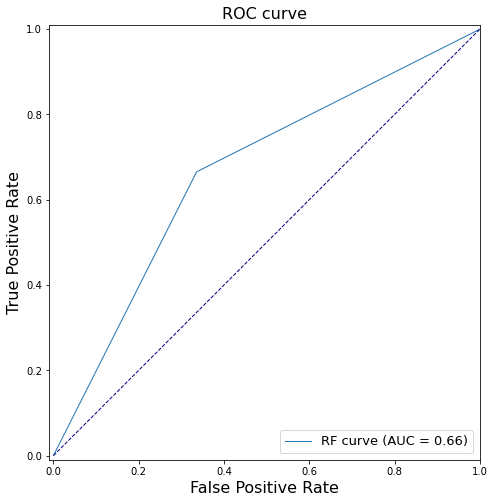

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 15 dimensions is :-
[[173 101]
 [ 95 165]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       274
           1       0.62      0.63      0.63       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


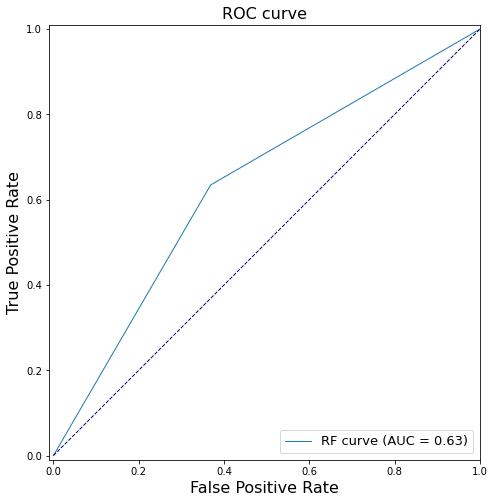

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 16 dimensions is :-
[[170 104]
 [107 153]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       274
           1       0.60      0.59      0.59       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


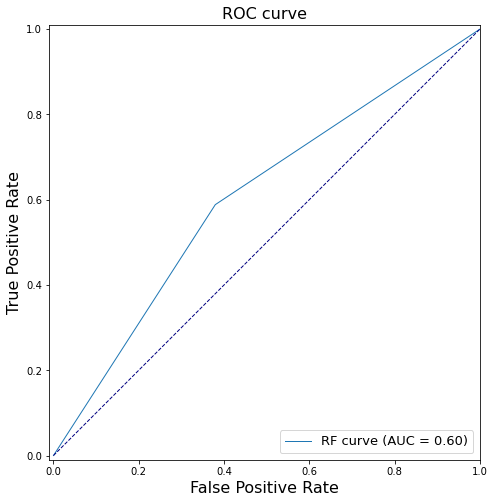

ICA Transformed - 17 dimensions is :-
[[176  98]
 [102 158]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       274
           1       0.62      0.61      0.61       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


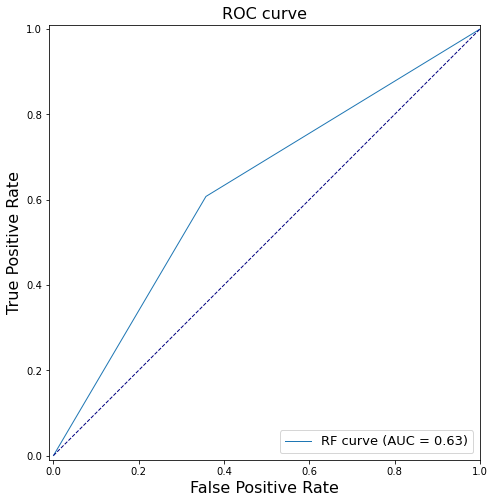

ICA Transformed - 18 dimensions is :-
[[182  92]
 [102 158]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       274
           1       0.63      0.61      0.62       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


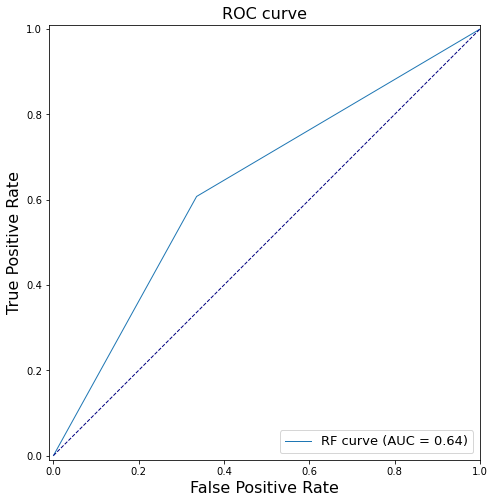

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 19 dimensions is :-
[[172 102]
 [107 153]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       274
           1       0.60      0.59      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


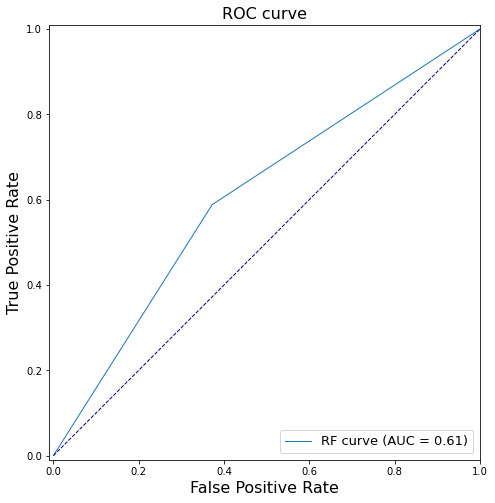

ICA Transformed - 20 dimensions is :-
[[171 103]
 [100 160]]
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       274
           1       0.61      0.62      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


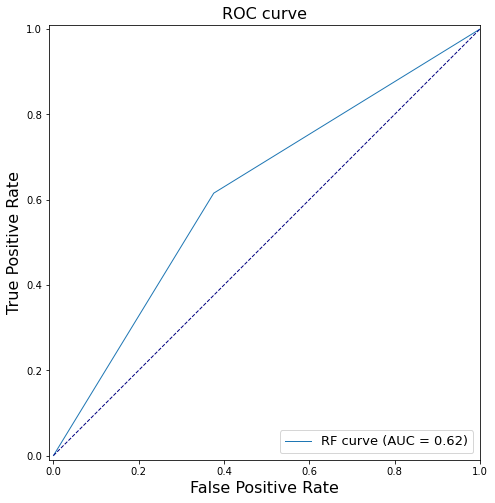

ICA Transformed - 21 dimensions is :-
[[179  95]
 [116 144]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       274
           1       0.60      0.55      0.58       260

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


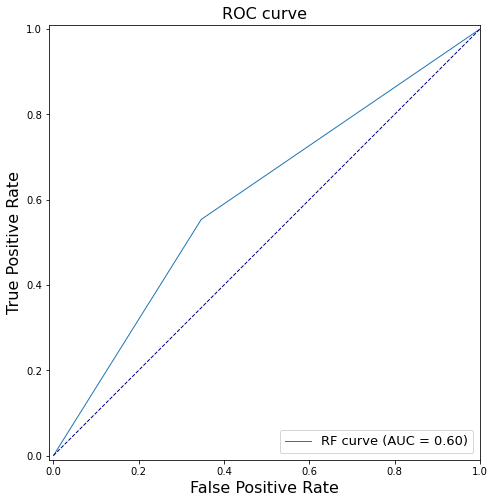

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 22 dimensions is :-
[[172 102]
 [103 157]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       274
           1       0.61      0.60      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


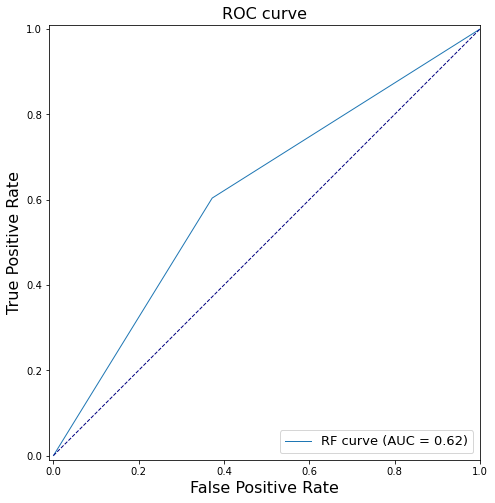

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 23 dimensions is :-
[[174 100]
 [101 159]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       274
           1       0.61      0.61      0.61       260

    accuracy                           0.62       534
   macro avg       0.62      0.62      0.62       534
weighted avg       0.62      0.62      0.62       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


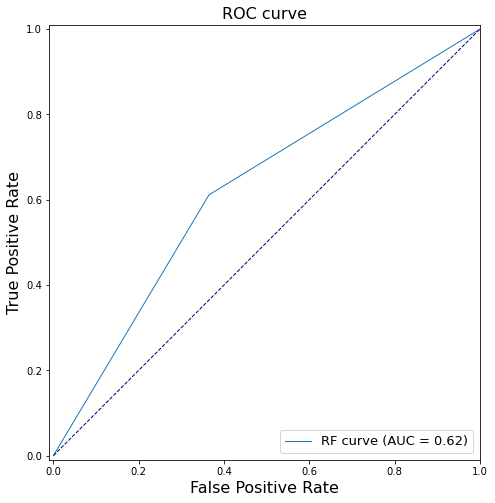

ICA Transformed - 24 dimensions is :-
[[185  89]
 [102 158]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       274
           1       0.64      0.61      0.62       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


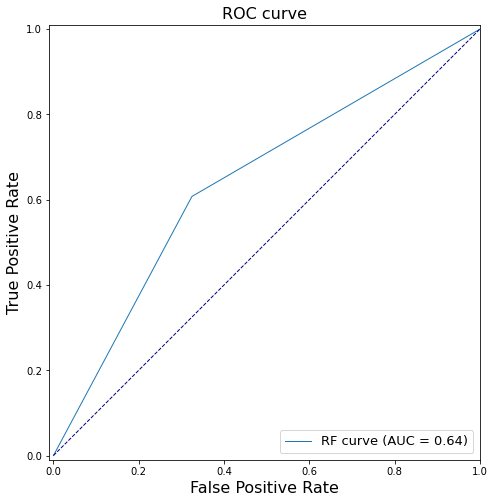

ICA Transformed - 25 dimensions is :-
[[178  96]
 [ 98 162]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       274
           1       0.63      0.62      0.63       260

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


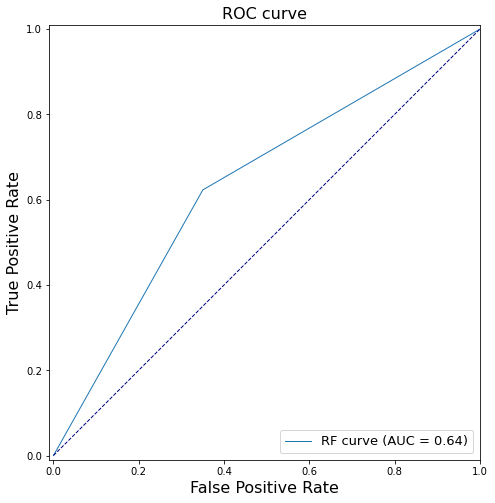

ICA Transformed - 26 dimensions is :-
[[175  99]
 [ 98 162]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


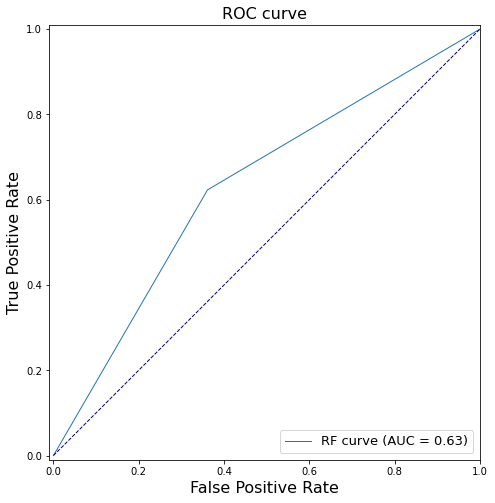

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 27 dimensions is :-
[[178  96]
 [100 160]]
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       274
           1       0.62      0.62      0.62       260

    accuracy                           0.63       534
   macro avg       0.63      0.63      0.63       534
weighted avg       0.63      0.63      0.63       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


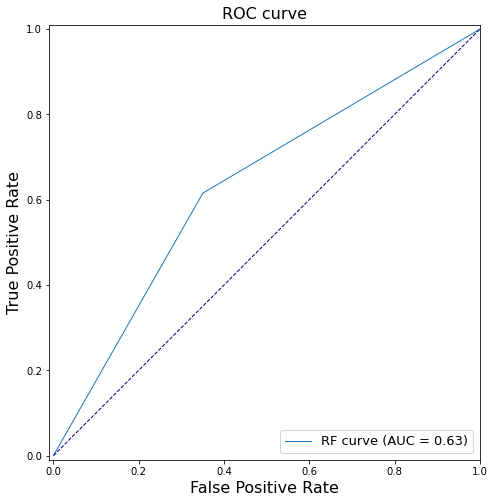

/home/biplab/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


ICA Transformed - 28 dimensions is :-
[[179  95]
 [ 87 173]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       274
           1       0.65      0.67      0.66       260

    accuracy                           0.66       534
   macro avg       0.66      0.66      0.66       534
weighted avg       0.66      0.66      0.66       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


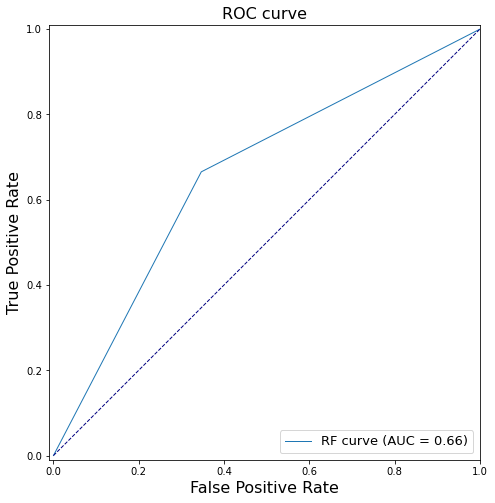

ICA Transformed - 29 dimensions is :-
[[172 102]
 [108 152]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       274
           1       0.60      0.58      0.59       260

    accuracy                           0.61       534
   macro avg       0.61      0.61      0.61       534
weighted avg       0.61      0.61      0.61       534



<ipython-input-1-486b140fb412>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


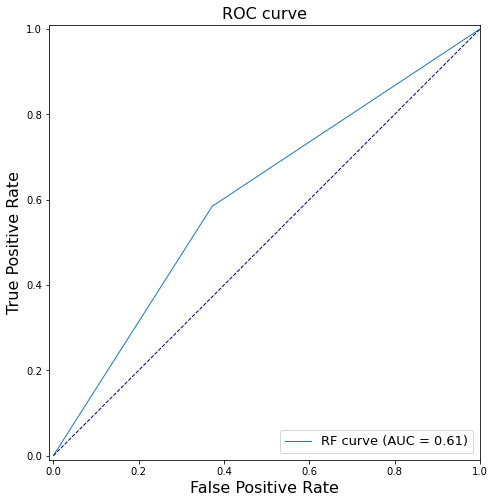

In [10]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

Best ICA Transformed in 8 dimensions is :-
[[7432  480]
 [ 481 1855]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7912
           1       0.79      0.79      0.79      2336

    accuracy                           0.91     10248
   macro avg       0.87      0.87      0.87     10248
weighted avg       0.91      0.91      0.91     10248



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


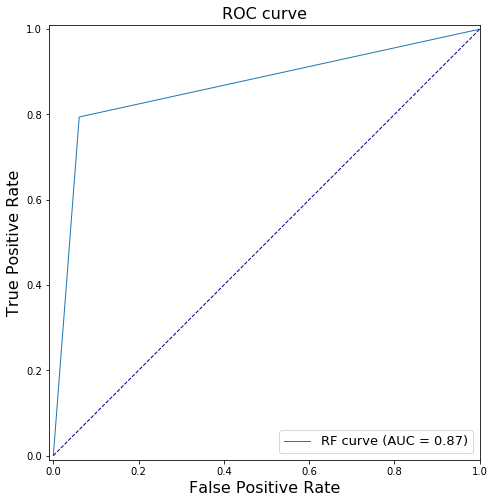

In [6]:
#Plotting Best ICA
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 8 dimensions is :-" )
forest_test(X_ica, Y)